In [1]:
data = ["What would you name your boat if you had one? ",
"What's the closest thing to real magic? ",
"Who is the messiest person you know? ",
"What will finally break the internet? ",
"What's the most useless talent you have? ",
"What would be on the gag reel of your life? ",
"Where is the worst smelling place you've been?",
"What Secret Do You Have That No One Else Knows Except Your Sibling/S?"
"What Did You Think Was Cool Then, When You Were Young But Isn’t Cool Now?"
"When Was The Last Time You Did Something And Regret Doing It?"
"What Guilty Pleasure Makes You Feel Alive?"
"Any fool can write code that a computer can understand. Good programmers write code that humans can understand.",
"First, solve the problem. Then, write the code.",
"Experience is the name everyone gives to their mistakes.",
" In order to be irreplaceable, one must always be different",
"Java is to JavaScript what car is to Carpet.",
"Knowledge is power.",
"Sometimes it pays to stay in bed on Monday, rather than spending the rest of the week debugging Monday’s code.",
"Perfection is achieved not when there is nothing more to add, but rather when there is nothing more to take away.", 
"Ruby is rubbish! PHP is phpantastic!",
" Code is like humor. When you have to explain it, it’s bad.",
"Fix the cause, not the symptom.",
"Optimism is an occupational hazard of programming: feedback is the treatment. " ,
"When to use iterative development? You should use iterative development only on projects that you want to succeed.",
"Simplicity is the soul of efficiency.",
"Before software can be reusable it first has to be usable.",
"Make it work, make it right, make it fast.",
"Programmer: A machine that turns coffee into code.",
"Computers are fast; programmers keep it slow.",
"When I wrote this code, only God and I understood what I did. Now only God knows.",
"A son asked his father (a programmer) why the sun rises in the east, and sets in the west. His response? It works, don’t touch!",
"How many programmers does it take to change a light bulb? None, that’s a hardware problem.",
"Programming is like sex: One mistake and you have to support it for the rest of your life.",
"Programming can be fun, and so can cryptography; however, they should not be combined.",
"Programming today is a race between software engineers striving to build bigger and better idiot-proof programs, and the Universe trying to produce bigger and better idiots. So far, the Universe is winning.",
"Copy-and-Paste was programmed by programmers for programmers actually.",
"Always code as if the person who ends up maintaining your code will be a violent psychopath who knows where you live.",
"Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it.",
"Algorithm: Word used by programmers when they don’t want to explain what they did.",
"Software and cathedrals are much the same — first we build them, then we pray.",
"There are two ways to write error-free programs; only the third works.",
"If debugging is the process of removing bugs, then programming must be the process of putting them in.",
"99 little bugs in the code. 99 little bugs in the code. Take one down, patch it around. 127 little bugs in the code …",
"Remember that there is no code faster than no code.",
"One man’s crappy software is another man’s full-time job.",
"No code has zero defects.",
"A good programmer is someone who always looks both ways before crossing a one-way street.",
"Deleted code is debugged code.",
"Don’t worry if it doesn’t work right. If everything did, you’d be out of a job.",
"It’s not a bug — it’s an undocumented feature.",
"It works on my machine.",
"It compiles; ship it.",
"There is no Ctrl-Z in life.",
"Whitespace is never white.",
"What’s your favorite way to spend a day off?",
"What type of music are you into?",
"What was the best vacation you ever took and why?",
"Where’s the next place on your travel bucket list and why?",
"What are your hobbies, and how did you get into them?",
"What was your favorite age growing up?",
"Was the last thing you read?",
"Would you say you’re more of an extrovert or an introvert?",
"What's your favorite ice cream topping?",
"What was the last TV show you binge-watched?",
"Are you into podcasts or do you only listen to music?",
"Do you have a favorite holiday? Why or why not?",
"If you could only eat one food for the rest of your life, what would it be?",
"Do you like going to the movies or prefer watching at home?",
"What’s your favorite sleeping position?",
"What’s your go-to guilty pleasure?",
"In the summer, would you rather go to the beach or go camping?",
"What’s your favorite quote from a TV show/movie/book?",
"How old were you when you had your first celebrity crush, and who was it?",
"What's one thing that can instantly make your day better?",
"Do you have any pet peeves",
"What’s your favorite thing about your current job?",
"What annoys you most?",
"What’s the career highlight you’re most proud of?",
"Do you think you’ll stay in your current gig awhile? Why or why not?",
"What type of role do you want to take on after this one?",
"Are you more of a work to live or a live to work type of person?",
"Does your job make you feel happy and fulfilled? Why or why not?",
"How would your 10-year-old self react to what you do now?",
"What do you remember most about your first job?",
"How old were you when you started working?",
"What’s the worst job you’ve ever had?",
"What originally got you interested in your current field of work?",
"Have you ever had a side hustle or considered having one?",
"What’s your favorite part of the workday?",
"What’s the best career decision you’ve ever made?",
"What’s the worst career decision you’ve ever made?",
"Do you consider yourself good at networking?"]

In [2]:
# Load EDA Pkgs
import pandas as pd
import random

In [3]:
# Shuffle dataset
random.shuffle(data)

In [4]:
# Convert to Dataframe
df = pd.DataFrame({'sentences':data})

In [5]:
# Train & Test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.7)

In [6]:
from snorkel.labeling import labeling_function,PandasLFApplier,LFAnalysis

In [7]:
# Constants for our labels
QUESTION = 1
QUOTE = 0
ABSTAIN = -1

In [8]:
### Keyword Lookup
@labeling_function()
def lf_keyword_lookup(x):
  keywords = ["why","what","when","who","where","how"]
  return QUESTION if any(word in x.sentences.lower() for word in keywords) else ABSTAIN

In [9]:
### Pattern Lookup/Regex Fxn
import re
@labeling_function()
def lf_regex_contains_what(x):
  return QUESTION if re.search(r"what.*?",x.sentences,flags=re.I) else ABSTAIN

In [10]:
### Pattern Lookup/Regex Fxn
import re
@labeling_function()
def lf_regex_contains_question_mark(x):
  return QUESTION if re.search(r".*?",x.sentences,flags=re.I) else ABSTAIN

In [11]:
### Apply Fxn
lfs = [lf_keyword_lookup,lf_regex_contains_what,lf_regex_contains_question_mark]
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df_train)

100%|████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 7952.65it/s]


In [12]:
df_train.head()

,sentences
15,What will finally break the internet?
5,Where’s the next place on your travel bucket l...
87,Who is the messiest person you know?
51,What’s your go-to guilty pleasure?
82,Software and cathedrals are much the same — fi...


In [13]:
# Label Matrix
L_train

array([[ 1,  1,  1],
       [ 1, -1,  1],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1],
       [ 1, -1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [ 1, -

In [14]:
### Evaluate the Performance
LFAnalysis(L=L_train,lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
lf_keyword_lookup,0,[1],0.573770,0.573770,0.0
lf_regex_contains_what,1,[1],0.393443,0.393443,0.0
lf_regex_contains_question_mark,2,[1],1.000000,0.573770,0.0


In [15]:
### MajorityLabel Voter

In [16]:
# LabelModel
from snorkel.labeling.model import MajorityLabelVoter,LabelModel

In [17]:
# Build the model
label_model = LabelModel(cardinality=2,verbose=True)
label_model.fit(L_train=L_train,n_epochs=500,log_freq=100,seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|                                                                                       | 0/500 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=1.138]
INFO:root:[100 epochs]: TRAIN:[loss=0.001]
INFO:root:[200 epochs]: TRAIN:[loss=0.000]
INFO:root:[300 epochs]: TRAIN:[loss=0.000]
100%|███████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3392.81epoch/s]
INFO:root:Finished Training


In [18]:
### Unlabeled Dataset
df_train.head()

,sentences
15,What will finally break the internet?
5,Where’s the next place on your travel bucket l...
87,Who is the messiest person you know?
51,What’s your go-to guilty pleasure?
82,Software and cathedrals are much the same — fi...


In [19]:
# apply our label model on our unlabeled dataset
df_train['Labels'] = label_model.predict(L=L_train,tie_break_policy="abstain")

In [20]:
df_train

,sentences,Labels
15,What will finally break the internet?,1
5,Where’s the next place on your travel bucket l...,1
87,Who is the messiest person you know?,1
51,What’s your go-to guilty pleasure?,1
82,Software and cathedrals are much the same — fi...,-1
...,...,...
85,Does your job make you feel happy and fulfille...,1
30,What's your favorite ice cream topping?,1
48,Would you say you’re more of an extrovert or a...,-1
68,Simplicity is the soul of efficiency.,-1


In [21]:
# Find where in the dataset it was labeled as Questions and assign it the new label
df_train[df_train.Labels != ABSTAIN]

,sentences,Labels
15,What will finally break the internet?,1
5,Where’s the next place on your travel bucket l...,1
87,Who is the messiest person you know?,1
51,What’s your go-to guilty pleasure?,1
57,Where is the worst smelling place you've been?,1
52,What would be on the gag reel of your life?,1
29,What type of music are you into?,1
31,What’s your favorite sleeping position?,1
7,What's one thing that can instantly make your ...,1
79,Always code as if the person who ends up maint...,1


In [22]:
df_train2 = df_train[df_train.Labels != ABSTAIN]

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='Labels', ylabel='count'>

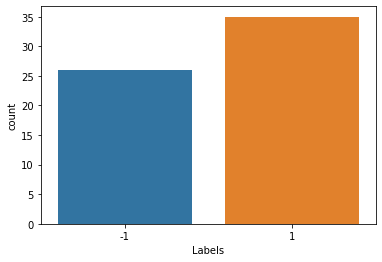

In [24]:
sns.countplot(x='Labels',data=df_train)

In [25]:
df_train

,sentences,Labels
15,What will finally break the internet?,1
5,Where’s the next place on your travel bucket l...,1
87,Who is the messiest person you know?,1
51,What’s your go-to guilty pleasure?,1
82,Software and cathedrals are much the same — fi...,-1
...,...,...
85,Does your job make you feel happy and fulfille...,1
30,What's your favorite ice cream topping?,1
48,Would you say you’re more of an extrovert or a...,-1
68,Simplicity is the soul of efficiency.,-1
